In [14]:
### GSEA enrichment analysis

library(clusterProfiler)
library(tidyverse)
library(dplyr)
library(msigdbr)
library(enrichplot)
library(DOSE)
library(ggplot2)
library("ggridges")
# GSEA_r <- snakemake@output[["GSEA_r"]]
# GSEA_ridgeplot <- snakemake@output[["GSEA_ridgeplot"]]
# type <- snakemake@wildcards[["msign"]]
# signature<-snakemake@wildcards[['cluster']]
type='C8'


[1] "sto facendo"
[1] "sto facendo"


preparing geneSet collections...

GSEA analysis...

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (14.24% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
leading edge analysis...

done...

Picking joint bandwidth of 0.833



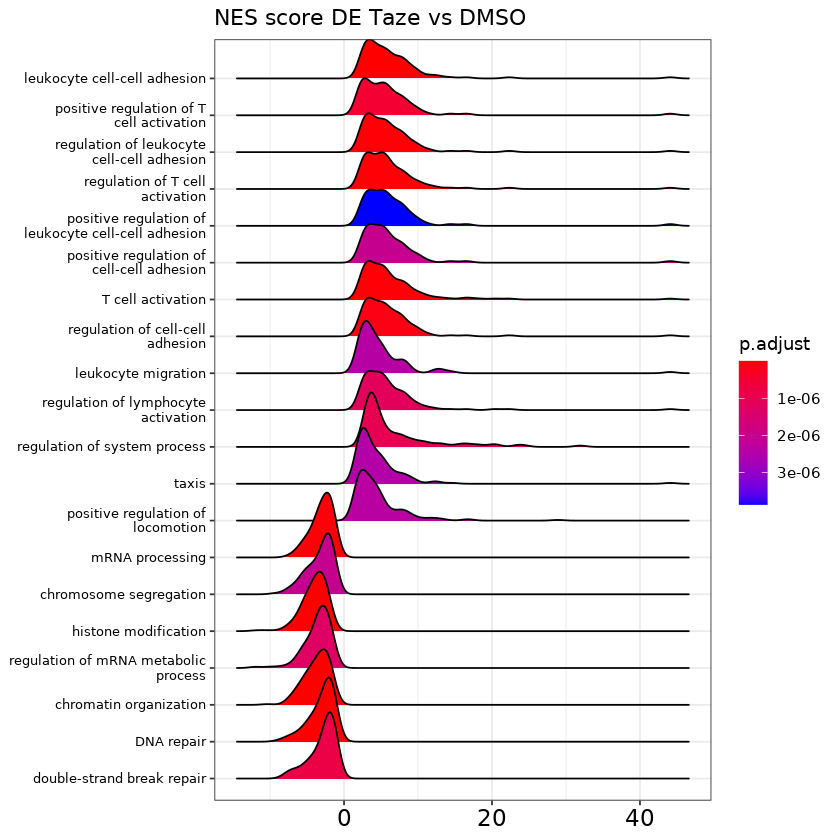

[1] "sto facendo"


'select()' returned many:many mapping between keys and columns

Warning message in left_join(mapped_genes, symbols, by = "ENSEMBL"):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 1 of `x` matches multiple rows in `y`.
ℹ Row 69 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


[1] "Creato: GO_term_gene_list_flat.csv"


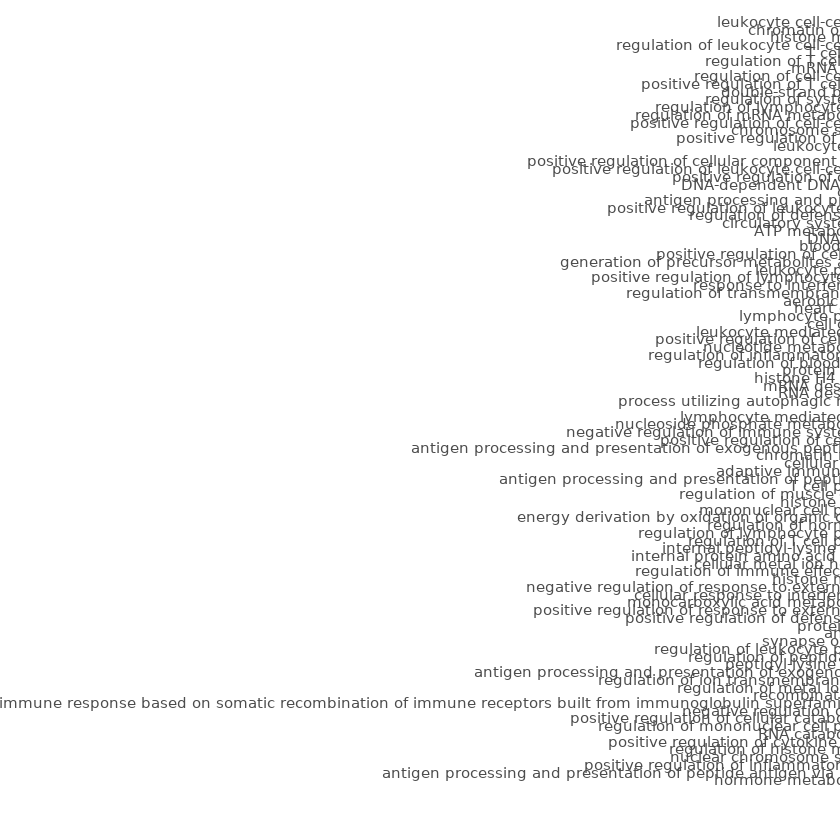

In [15]:
print("sto facendo")
waffle="/sharedFolder/Data/2_RNA_seq/TazeVSDMSO/DEfull.txt"
gene_res_df <- read.table(waffle, sep = "\t",header = TRUE,row.names=1 )
term2gene=rownames(gene_res_df)
term2gene=t(rbind(sapply(term2gene,FUN=function(x){
strsplit(x,":")[[1]]
})))
rownames(gene_res_df)=sapply(rownames(gene_res_df),FUN=function(x){
strsplit(x,":")[[1]][2]
})


# Calcola l'indice di ordinamento
sort_index <- order(-gene_res_df$stat)

# Ordina la matrice in base all'indice di ordinamento
gene_res_df <- gene_res_df[sort_index,]
geneList=cbind(rownames(gene_res_df),gene_res_df$stat)
geneList <- geneList[which(!is.na(geneList[,2])),]
geneList2=as.numeric(geneList[,2])
names(geneList2)=geneList[,1]
sort_index <- order(geneList2, decreasing = TRUE)
geneList2 <- geneList2[sort_index]
print("sto facendo")

#pdf("/sharedFolder/Data/2_RNA_seq/TazeVSDMSO/TAZENES_GO.pdf")
gse=gseGO(geneList2,ont="BP",keyType="ENSEMBL",OrgDb="org.Mm.eg.db",eps=1e-300)
ridgeplot(gse, showCategory = 20) +
  theme(axis.text.y = element_text(size = 8)) +
  labs(title = "NES score DE Taze vs DMSO")
#dev.off()
result <- gse@result
result$p.adjust=-log10(result$p.adjust)
result <- result[sort(result$p.adjust,index.return=TRUE,decreasing=TRUE)$ix, ]
result <- result[1:100, ]
result$Description <- factor(result$Description, levels = result$Description)

p <- ggplot(result, aes(x = p.adjust, y = reorder(Description, p.adjust))) +
  geom_bar(stat = "identity", fill = "red") +
  ylab("GO enrichment") +
  xlab("-log10(p.adjust)") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1))
#pdf("/sharedFolder/Data/2_RNA_seq/TazeVSDMSO/TAZEpadj_GeneOntology.pdf")
print(p)
#dev.off()
print("sto facendo")
library(org.Mm.eg.db)
library(clusterProfiler)
library(tidyverse)

# 1. Estrai da p$data
df <- p$data
df$ensembl <- strsplit(df$core_enrichment, "/")

# 2. Espandi GO term e ENSEMBL in righe
mapped_genes <- tibble(
  Description = rep(df$Description, sapply(df$ensembl, length)),
  ENSEMBL = unlist(df$ensembl)
)

# 3. Mappa ENSEMBL → SYMBOL
symbols <- AnnotationDbi::select(
  org.Mm.eg.db,
  keys = mapped_genes$ENSEMBL,
  keytype = "ENSEMBL",
  columns = "SYMBOL"
)

# 4. Unisci SYMBOL ai GO term
mapped_genes <- left_join(mapped_genes, symbols, by = "ENSEMBL")

# 5. Rimuovi duplicati
mapped_genes <- distinct(mapped_genes, Description, SYMBOL)

# 6. Aggrega: una riga per GO term, con gene names separati da virgola
aggregated <- mapped_genes %>%
  group_by(Description) %>%
  summarise(Gene_Names = paste(unique(SYMBOL), collapse = ","))

# 7. Scrivi il file
write.csv(aggregated, "/sharedFolder/Data/GO_term_gene_list_flatTAZE.csv", row.names = FALSE)

# Conferma
print("Creato: GO_term_gene_list_flat.csv")


In [48]:
waffle="/sharedFolder/Data/2_RNA_seq/TazeVSDMSO/DEfiltered_log2fc_1_fdr_0.1.txt"
aggregated=read.table("/sharedFolder/TEST/GO_term_gene_list_flatTAZE.csv",header=TRUE,row.names=1,sep=",")
gene_res_df <- read.table(waffle, sep = "\t",header = TRUE,row.names=1 )
DE=(sapply(rownames(gene_res_df),FUN=function(x){
strsplit(x,":")[[1]][1]
}))
inter=list()
for(i in seq(1,nrow(aggregated))){
    print("hello")
inter[[i]]=intersect(strsplit(as.matrix(aggregated[i,1]),",")[[1]],DE)
}
names(inter)=rownames(aggregated)

[1] "hello"
[1] "hello"
[1] "hello"
[1] "hello"
[1] "hello"
[1] "hello"
[1] "hello"
[1] "hello"
[1] "hello"
[1] "hello"
[1] "hello"
[1] "hello"
[1] "hello"
[1] "hello"
[1] "hello"
[1] "hello"
[1] "hello"
[1] "hello"
[1] "hello"
[1] "hello"


In [61]:
for(i in seq(1,length(inter))){
print(paste(names(inter)[i],length(inter[[i]])))
}

[1] "DNA repair 0"
[1] "histone modification 1"
[1] "leukocyte cell-cell adhesion 12"
[1] "chromatin organization 1"
[1] "T cell activation 15"
[1] "mRNA processing 0"
[1] "regulation of T cell activation 10"
[1] "regulation of leukocyte cell-cell adhesion 10"
[1] "DNA double-strand break repair 0"
[1] "positive regulation of T cell activation 3"
[1] "regulation of lymphocyte activation 13"
[1] "regulation of system process 20"
[1] "regulation of cell-cell adhesion 13"
[1] "regulation of mRNA metabolic process 0"
[1] "chemotaxis 8"
[1] "chromosome segregation 0"
[1] "taxis 8"
[1] "positive regulation of locomotion 9"
[1] "positive regulation of leukocyte cell-cell adhesion 4"
[1] "positive regulation of cellular component movement 8"


[1] "positive regulation of cellular component movement 1"

In [43]:
strsplit(as.matrix(aggregated[i,1]),",")[[1]]

[1] "Hdac9"    "Tgfbr1"   "Igf1"     "Ror2"     "Jun"      "App"     
  [7] "Tmsb4x"   "Grn"      "Jak2"     "Lef1"     "Sema3b"   "Pik3r1"  
 [13] "Nrp1"     "Actg1"    "Adam8"    "Calr"     "Ptger4"   "Rac2"    
 [19] "Stat3"    "Tnfsf4"   "Sema4d"   "Itga3"    "Cd99l2"   "F3"      
 [25] "Pdgfa"    "Nr4a3"    "Ccr7"     "Myadm"    "Vsir"     "Col18a1" 
 [31] "Cd74"     "Bsg"      "Itgax"    "Ilk"      "Ctsh"     "Stat5b"  
 [37] "Stmn1"    "Ackr3"    "Prr5"     "Cpne3"    "Cd47"     "Tnfsf14" 
 [43] "Cpeb1"    "Stat5a"   "Tgfb1"    "Lgals9"   "Met"      "Bcar1"   
 [49] "Cfl1"     "Hspb1"    "S100a11"  "Fgf7"     "Ephb2"    "Atp5a1"  
 [55] "Ccl1"     "Fbln1"    "Dab2ip"   "Gab2"     "Cd40"     "Igf1r"   
 [61] "Snai1"    "Tubb2b"   "Coro1a"   "Pfn1"     "Thy1"     "Vegfb"   
 [67] "Fam107a"  "Gnai2"    "Rhoc"     "Bdkrb1"   "Lamc2"    "Fermt3"  
 [73] "Madcam1"  "Itgb3"    "Ddr2"     "Slamf1"   "Glipr2"   "Akt1"    
 [79] "Tlr4"     "Hif1a"    "Itga6"    "Sdcbp"    "Itgb1"    "Sema7a"  
 [85] "Carmil1"  "Atp5b"    "Sema3f"   "Ntn1"     "Mapk8"    "Gpld1"   
 [91] "Cxcl10"   "Emc10"    "Mapre2"   "Mylk"     "Rac1"     "Actr3"   
 [97] "Ccl5"     "Icam1"    "Shtn1"    "Gpi1"     "Mien1"    "Prox1"   
[103] "Amotl1"   "Mapk3"    "C1qbp"    "Elp3"     "Reln"     "Zc3h12a" 
[109] "Map2"     "Mapk1"    "Synpo2"   "Pik3cd"   "Epb41l4b" "Xcl1"    
[115] "Mcu"      "Arhgef39" "Sema4f"   "Phpt1"    "Ccr6"     "Mpzl1"   
[121] "Sema6b"   "Furin"    "Grin1"    "Serpine1" "Rras"     "Egfr"    
[127] "Gpsm3"    "Anxa3"    "Mcam"     "Gab1"     "F2r"      "Flna"    
[133] "Pycard"   "Cldn4"    "Sema5a"   "Ccr1"     "Dapk2"    "Cldn13"  
[139] "Slc26a5"  "Pik3cg"   "Oxsr1"    "Rhoa"     "Mmp9"     "Aldoa"   
[145] "Sparc"    "Notch1"   "Plet1"    "Hmgb1"    "Postn"    "Sema4b"  
[151] "Retn"     "Adgra2"   "Il12a"    "Dmtn"     "Pld2"     "Cib1"    
[157] "Elp5"     "Ret"      "Sema4c"   "Rack1"    "Fadd"     "Twist2"  
[163] "Anxa1"    "Il1b"     "Ptger3"   "Thbs1"    "Ccn4"     "Fermt2"  
[169] "Trf"      "Cfap69"   "Tnfrsf18" "Rtn4"     "Col1a1"

In [45]:
rownames(aggregated)

[1] "DNA repair"                                         
 [2] "histone modification"                               
 [3] "leukocyte cell-cell adhesion"                       
 [4] "chromatin organization"                             
 [5] "T cell activation"                                  
 [6] "mRNA processing"                                    
 [7] "regulation of T cell activation"                    
 [8] "regulation of leukocyte cell-cell adhesion"         
 [9] "DNA double-strand break repair"                     
[10] "positive regulation of T cell activation"           
[11] "regulation of lymphocyte activation"                
[12] "regulation of system process"                       
[13] "regulation of cell-cell adhesion"                   
[14] "regulation of mRNA metabolic process"               
[15] "chemotaxis"                                         
[16] "chromosome segregation"                             
[17] "taxis"                                              
[18] "positive regulation of locomotion"                  
[19] "positive regulation of leukocyte cell-cell adhesion"
[20] "positive regulation of cellular component movement"

In [ ]:
print("sto facendo")
waffle="/sharedFolder/Data/2_RNA_seq/ValeVSDMSO/DEfull.txt"
gene_res_df <- read.table(waffle, sep = "\t",header = TRUE,row.names=1 )
term2gene=rownames(gene_res_df)
term2gene=t(rbind(sapply(term2gene,FUN=function(x){
strsplit(x,":")[[1]]
})))
rownames(gene_res_df)=sapply(rownames(gene_res_df),FUN=function(x){
strsplit(x,":")[[1]][2]
})


# Calcola l'indice di ordinamento
sort_index <- order(-gene_res_df$stat)

# Ordina la matrice in base all'indice di ordinamento
gene_res_df <- gene_res_df[sort_index,]
geneList=cbind(rownames(gene_res_df),gene_res_df$stat)
geneList <- geneList[which(!is.na(geneList[,2])),]
geneList2=as.numeric(geneList[,2])
names(geneList2)=geneList[,1]
sort_index <- order(geneList2, decreasing = TRUE)
geneList2 <- geneList2[sort_index]
print("sto facendo")

#pdf("/sharedFolder/Data/2_RNA_seq/ValeVSDMSO/VALENES_GO.pdf")
gse=gseGO(geneList2,ont="BP",keyType="ENSEMBL",OrgDb="org.Mm.eg.db",eps=1e-300)
ridgeplot(gse, showCategory = 20) +
  theme(axis.text.y = element_text(size = 8)) +
  labs(title = "NES score DE Vale vs DMSO")
#dev.off()
result <- gse@result
result$p.adjust=-log10(result$p.adjust)
result <- result[sort(result$p.adjust,index.return=TRUE,decreasing=TRUE)$ix, ]
result <- result[1:100, ]
result$Description <- factor(result$Description, levels = result$Description)

p <- ggplot(result, aes(x = p.adjust, y = reorder(Description, p.adjust))) +
  geom_bar(stat = "identity", fill = "red") +
  ylab("GO enrichment") +
  xlab("-log10(p.adjust)") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1))
#pdf("/sharedFolder/Data/2_RNA_seq/ValeVSDMSO/Valepadj_GeneOntology.pdf")
print(p)
#dev.off()
print("sto facendo")
write.csv(p$data, "/sharedFolder/Data/GO_core_enrichment_genesVALE.csv", row.names = FALSE)
# 1. Estrai da p$data
df <- p$data
df$ensembl <- strsplit(df$core_enrichment, "/")

# 2. Espandi GO term e ENSEMBL in righe
mapped_genes <- tibble(
  Description = rep(df$Description, sapply(df$ensembl, length)),
  ENSEMBL = unlist(df$ensembl)
)

# 3. Mappa ENSEMBL → SYMBOL
symbols <- AnnotationDbi::select(
  org.Mm.eg.db,
  keys = mapped_genes$ENSEMBL,
  keytype = "ENSEMBL",
  columns = "SYMBOL"
)

# 4. Unisci SYMBOL ai GO term
mapped_genes <- left_join(mapped_genes, symbols, by = "ENSEMBL")

# 5. Rimuovi duplicati
mapped_genes <- distinct(mapped_genes, Description, SYMBOL)

# 6. Aggrega: una riga per GO term, con gene names separati da virgola
aggregated <- mapped_genes %>%
  group_by(Description) %>%
  summarise(Gene_Names = paste(unique(SYMBOL), collapse = ","))

# 7. Scrivi il file
write.csv(aggregated, "/sharedFolder/Data/GO_term_gene_list_flatVALE.csv", row.names = FALSE)

# Conferma
print("Creato: GO_term_gene_list_flat.csv")

In [11]:
unique(c("Luca","Luca","Jianli","Jianli"))

[1] "Luca"   "Jianli"

In [2]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 20.04.3 LTS

Matrix products: default
BLAS:   /usr/local/lib/R/lib/libRblas.so
LAPACK: /usr/local/lib/R/lib/libRlapack.so

locale:
 [1] LC_CTYPE=C.UTF-8    LC_NUMERIC=C        LC_TIME=C          
 [4] LC_COLLATE=C        LC_MONETARY=C       LC_MESSAGES=C      
 [7] LC_PAPER=C          LC_NAME=C           LC_ADDRESS=C       
[10] LC_TELEPHONE=C      LC_MEASUREMENT=C    LC_IDENTIFICATION=C

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] ggridges_0.5.4        DOSE_3.20.1           enrichplot_1.14.2    
 [4] msigdbr_7.5.1         lubridate_1.9.2       forcats_1.0.0        
 [7] stringr_1.5.0         dplyr_1.1.2           purrr_1.0.1          
[10] readr_2.1.4           tidyr_1.3.0           tibble_3.2.1         
[13] ggplot2_3.4.2         tidyverse_2.0.0       clusterProfiler_4.2.2
[16] repr_1.1.6           

loaded via 

In [184]:
#library(R.utils)
#R.utils::setOption("clusterProfiler.download.method","auto")
#getOption("clusterProfiler.download.method")
#gse <- gseKEGG(geneList2, organism="mmu")
